Parcial 1 Minería de datos

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [3]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas


In [4]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/student-mat.csv',
    sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Punto 1. ¿Existen valores vacios o nulos para algunas variables del dataset?

In [ ]:
df.isna().sum() #NA

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.isnull().sum() #Nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No se encontraron vacios o nulos en el dataset

#Punto 2. ¿Cuantos estudiantes viven en zona urbana o rural? ¿Cuantos de los etudiantesrurales son hombres?

In [13]:
df.groupby(['address']).size()

address
R     88
U    307
dtype: int64

In [12]:
df.groupby(['address','sex']).size()

address  sex
R        F       44
         M       44
U        F      164
         M      143
dtype: int64

Hay 88 estudiantes que viven en zona rural y 307 en zona urbana. Con respecto a los hombres que viven en area rural, suman un total 44.

# Punto 3. ¿Cuantos estudiantes que viven en zona rural tienen mas de 5 fallas? ¿Cuantos de ellos son hombres?

In [45]:
df.loc[:,['address','absences']].loc[df['absences'] > 5].groupby(['address']).count()

,absences
address,
R,38
U,108


In [46]:
df.loc[:,['address','sex','absences']].loc[df['absences'] > 5].groupby(['address','sex']).count()

absences
address sex          
R       F          20
        M          18
U       F          60
        M          48

Se encontro que 38 estudiantes que viven en zona rural tienen mas de 5 fallas, entre los cuales, 18 son hombres.

# Punto 4. Se quiere ver la media de las notas de matematicas de tercer corte (G3) de los estudiantes del colegio Gabriel Pereira vs Mousinho de Silveria, teniendo en cuenta si los estudiantes tienen o no internet en sus casas

In [26]:
df.groupby(['school','internet']).mean().loc[:,['G3']]

G3
school internet           
GP     no         9.673077
       yes       10.632997
MS     no         8.428571
       yes       10.468750

Los promedios del tercer corte para los estudiantes del Gabriel pereira fueron:
- 9.6731 para aquellos que no poseian acceso a intenet en casa
- 10.6330 para aquellos que si tenian acceso a internet en sus hogares

Con respecto a los del Mousinho de Silveria, sus promedios este corte fueron:
- 8.4286 para aquellos que no poseian acceso a intenet en casa
- 10.4687 para aquellos que si tenian acceso a internet en sus hogares

El colegio con promedios mas altos fue el Gabriel pereira

# Punto 5. cree una nueva variable en la tabla que corresponda al total de la calificación de los estudiantes y presente su media, mediana minimo y maximo.

In [36]:
df_1=df.assign(Total= lambda dataframe: 0.3*dataframe['G1']+0.3*dataframe['G2']+0.4*dataframe['G3'])
df_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.7
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.5
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.7
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.4
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.2
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,10.9


In [34]:
df_1.describe().loc[:,'Total']

count    395.000000
mean      10.652911
std        3.769058
min        1.200000
25%        8.300000
50%       10.700000
75%       13.300000
max       19.400000
Name: Total, dtype: float64

Tras calcular las notas finales de los estudiantes, se encontro que la nota mas baja fue de 1.2 unidades y la mas alta de 19.4 unidades. El promedio de las mismas fue de 10.65 unidades. Tambien se puede ver como el 50% de los datos (mediana) obtuvieron una nota de 10.70 o inferior.

# Punto 6. Teniendo en cuenta que el dataset contiene tanto variables numericas como variables categoricas responda: ¿Que tipo de analisis realizaría: ¿Regresión o clasificación? ¿Que variable deberia predecir o clasificar?

In [57]:
df_2= df.loc[:,['G1','G2','G3','age','sex']]
corr=df_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,G1,G2,G3,age
G1,1.000000,0.852118,0.801468,-0.064081
G2,0.852118,1.000000,0.904868,-0.143474
G3,0.801468,0.904868,1.000000,-0.161579
age,-0.064081,-0.143474,-0.161579,1.000000


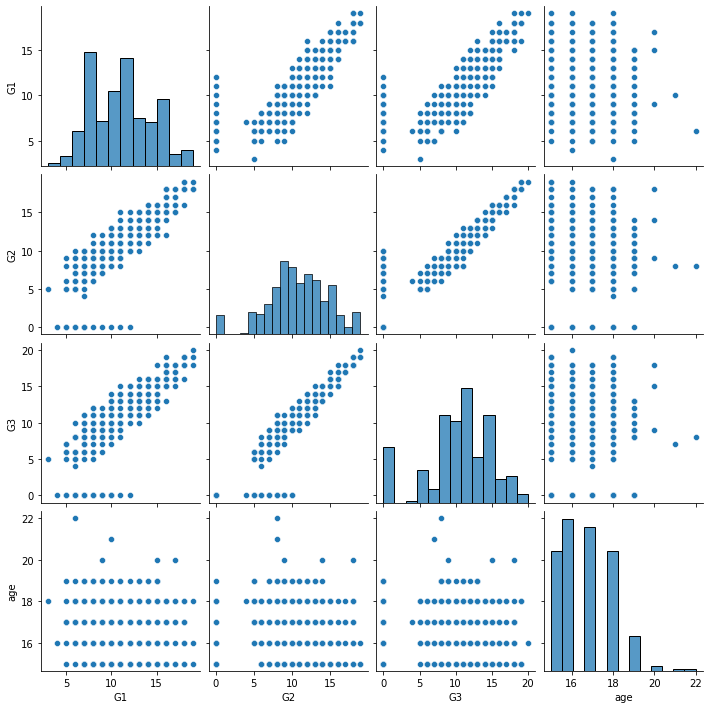

In [58]:
sns.pairplot(df_2)

In [59]:
df.loc[:,['G3','address','sex']].groupby(['address','sex']).mean()

G3
address sex           
R       F     9.272727
        M     9.750000
U       F    10.152439
        M    11.272727

In [61]:
df.loc[:,['G3','school','sex']].groupby(['school','sex']).mean()

G3
school sex           
GP     F     9.972678
       M    11.060241
MS     F     9.920000
       M     9.761905

In [64]:
df.loc[:,['G3','studytime','sex']].groupby(['studytime','sex']).mean()

G3
studytime sex           
1         F     9.851852
          M    10.115385
2         F     9.495575
          M    11.070588
3         F    10.725490
          M    13.857143
4         F    11.000000
          M    11.700000

In [65]:
df.groupby(['school','internet','sex']).mean().loc[:,['G3']]

G3
school internet sex           
GP     no       F     9.133333
                M    10.409091
       yes      F    10.137255
                M    11.159722
MS     no       F     9.375000
                M     7.166667
       yes      F    10.176471
                M    10.800000

In [66]:
df.groupby(['school']).mean().loc[:,['G3']]

,G3
school,
GP,10.489971
MS,9.847826


In [67]:
df.groupby(['freetime']).mean().loc[:,['G3']]

,G3
freetime,
1,9.842105
2,11.562500
3,9.783439
4,10.426087
5,11.300000


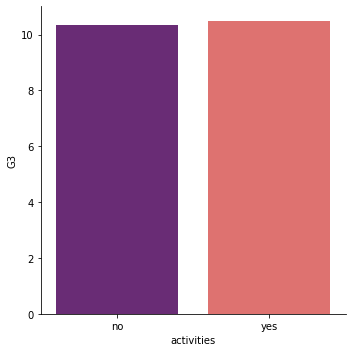

In [72]:
sns.catplot(data = df,
            kind = "bar",
            estimator = np.mean,
            x = "activities",
            y = "G3",
            palette = 'magma',
            ci = None)

Con fines de encontrar metodos para mejroar las calificaciónes de los estudiantes, seria idonea realizar una regresión cuya variable objetivo sea estimar la nota del tercer corte, ya que esta es la que posee un mayor valor con respecto a los dos anteriores. Se puede evidenciar una posible relacion lineal positiva entre las notas obtenidas en los diferentes periodos, ademas de poder ver promedios mas altos en estudiantes de areas urbanas. La edad no parece ser un factor influyente para este fin, pero el sexo si suele diferir bastante cuando al promedio de la calificación se habla. finalmente, revisando las actividades extracurriculares no parecen tener una diferencia entre aquellos que las tienes y quienes no. Como seleccion final, las calificaciones de los periodos anterirores, el sexo, la zona donde viven y el acceso a internet pueden ser variables bastante buenas para un esquema de regresión buscando predecir esa calificación del tercer corte.